In [1]:
cd D:/

D:\


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv("Tips Quick EDA exercise v0.1.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df['tip'].mean()

2.9982786885245902

In [12]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [13]:
df['tip'].median()

2.9

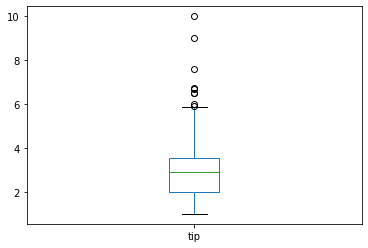

In [14]:
df.boxplot(column=['tip'],grid=False)
plt.show()

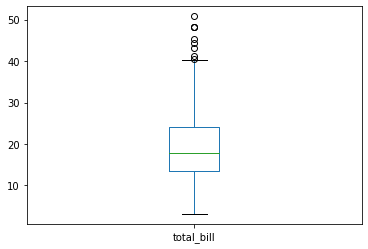

In [17]:
df.boxplot(column=['total_bill'],grid=False)
plt.show()

In [19]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

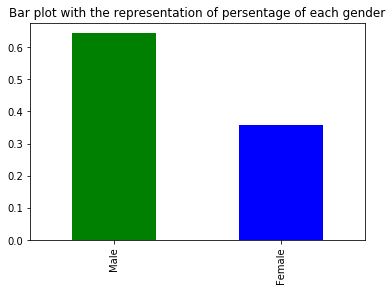

In [21]:
# prepare gender wise percentage bar graphs
gender_wise_percentage=df['sex'].value_counts(normalize=True*100)
gender_wise_percentage.plot(kind='bar',color=['g','b'])
plt.title('Bar plot with the representation of persentage of each gender')
plt.show()

In [23]:
#Does the aveage tip differ by gender?
df.pivot(columns='sex',values='tip').mean()

sex
Female    2.833448
Male      3.089618
dtype: float64

In [24]:
#Does the average tip differ by day or time?
df.pivot_table(index='day',values='tip',columns='time')

time,Dinner,Lunch
day,,
Fri,2.940000,2.382857
Sat,2.993103,NaN
Sun,3.255132,NaN
Thur,3.000000,2.767705


In [27]:
# Does the average tip is differ by size
df.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [28]:
#Do smoker tip more than non smoker
df.pivot(columns="smoker",values='tip').count()

smoker
No     151
Yes     93
dtype: int64

In [29]:
#create 2 by 2 matrix for gender vs smoker or non smoker
df.pivot_table(index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [34]:
#create a new thing calle pct_tip=tip/totalbill*100  give percentage of bill better tip behaviour
df["pct_tip"]=df.tip/df.total_bill*100
df

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [35]:
#Does pct_tip is differ by gender
df.pivot(columns='sex',values='pct_tip').count()

sex
Female     87
Male      157
dtype: int64

In [41]:
#does pct_tip is differ by size
df.pivot(columns='size', values='pct_tip').count()

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

In [42]:
#make the gender vs smoker
df.pivot_table(index='sex',columns='smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,15.692097,18.215035
Male,16.066872,15.277118


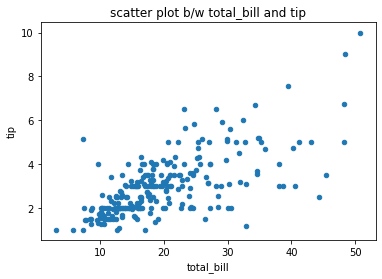

In [43]:
#Make a scatter plot b/w total_bill vs tip
df.plot.scatter('total_bill','tip')
plt.title('scatter plot b/w total_bill and tip')
plt.show()

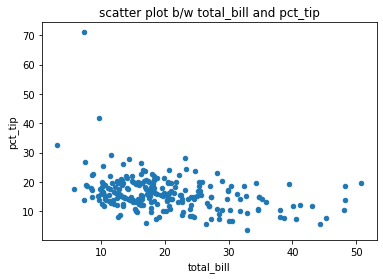

In [44]:
#make a scatter plot b/w total_bill vs pct_tip
df.plot.scatter("total_bill","pct_tip")
plt.title('scatter plot b/w total_bill and pct_tip')
plt.show()